Ενρίκα Ηλιάνα Ματζόρι

ΑΜ: 03120143

Mount το google drive. Το κάνουμε αυτό για έχουμε πρόσβαση στα python modules που χρειαζόμαστε.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Το συνδέουμε με το folder του συγκεκριμένου εργαστηρίου

In [ ]:
import sys
sys.path.insert(0,'/content/drive/My Drive/Lab_DL_ex1')

Εγκαθιστούμε τις απαραίτητες βιβλιοθήκες

In [ ]:
import sys
#!{sys.executable} -m pip install torch==1.10.1 torchvision==0.11.2 torchaudio==0.10.1
!{sys.executable} -m pip install torch torchvision torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
!{sys.executable} -m pip install matplotlip

### Οδηγίες

Σε αυτή την εργασία θα κάνετε τα εξής:
1. Δοκιμή τουλάχιστον των 3 καλύτερων συνδυασμών των παραμέτρων width και depth του Δικτύου wideResNet σύμφωνα με αυτά που προτείνονται και στο paper (results with moderate data augmentation)

2. Regularization. Το δίκτυο έχει μηχανισμό ομαλοποίησης (Dropout). Δοκιμάστε να προσθέσετε το Dropout (παράμετρος droprate) όπως αναφέρει το paper και καταγράψτε τα αποτελέσματα για τα παραπάνω μοντέλα.

3. Κρατώντας τις παραμέτρους του δικτύου με τα καλύτερα αποτελέσματα (load best model από το 1 και 2) θα κάνετε test στο CIFAR-C. Έπειτα, θα εφαρμόσετε τη μέθοδο mixup (συμπληρώστε τον κώδικα στο κελί με το CifarDataset) κάντε εκ νέου την εκπαίδευση και καταγράψτε τα αποτελέσματα.

4. (Bonus) Κάντε επίσης ένα plot των confidence scores (softmax predictions) και συγκρίνετε το με το αντίστοιχο plot όταν το μοντέλο δεν είχε mixup. Τι παρατηρείτε?

Tip: Για το κάθε πείραμα (training) μην το τρέξετε πάνω από 20 εποχές


Ορισμένα κελιά κώδικα παρέχονται για εσάς σε αυτό το notebook. Θα πρέπει να αποφύγετε την επεξεργασία του παρεχόμενου κώδικα και να φροντίσετε να εκτελέσετε τα κελιά για να αποφύγετε απροσδόκητα σφάλματα. Ορισμένα κελιά ξεκινούν με τη γραμμή:

΄#### GRADED CELL ####`
Αυτά θα βαθμολογηθούν. Φρόντιστε για κάθε κελί να δικαιολογείτε με σχόλια τις επιλογές σας.


### Ας ξεκινήσουμε!

Θα ξεκινήσουμε την εκτέλεση ορισμένων imports και τη φόρτωση του συνόλου δεδομένων. Μην επεξεργαστείτε τα υπάρχοντα imports στο παρακάτω κελί. Εάν θέλετε να κάνετε περαιτέρω imports, θα πρέπει να τα προσθέσετε εδώ.

Φορτώνουμε τις απαραίτητες βιβλιοθήκες

In [ ]:
import numpy as np
import time
import torch
import torch.nn.functional as F
from torchvision import transforms
from torchvision import datasets
import torch.nn as nn
import torch.optim
import torch.utils.data
from torch.utils.data import Dataset, DataLoader
import pickle
import random
from wideresnet import WideResNet
import logging
import shutil
import os
import matplotlib.pyplot as plt



torch.manual_seed(0)
np.random.seed(0)


In [ ]:
data_dir = "/content/drive/My Drive/Lab_DL_ex1/data"




Δημιουργία φακέλου στο οποίο θα κρατάμε τα log files των πειραμάτων

In [ ]:

exp_name = "/content/drive/My Drive/Lab_DL_ex1/Lab_1_DL_wrn_log"

exp_dir = os.path.join('Cifar', exp_name)

if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)


logfile = open(os.path.join(exp_dir, 'log'), 'w')

Στο παρακάτω κελί θα δημιουργήσουμε το train και validation loader χρησιμοποιώντας τη συνάρτηση construct_datasets

In [ ]:
def construct_datasets(data_dir, batch_size):
    def data2loader_train(tr_data):
        train_loader = torch.utils.data.DataLoader(
            tr_data,
            batch_size=batch_size,
            shuffle=True)
        return train_loader

    def data2loader_test(te_data):
        test_loader = torch.utils.data.DataLoader(
            te_data,
            batch_size=batch_size,
            shuffle=False)

        return test_loader

    to_tensor = transforms.ToTensor()
    normalize = transforms.Normalize([0.5] * 3, [0.5] * 3)
    train_transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),
         transforms.RandomCrop(32, padding=4),
         transforms.ToTensor(), normalize])

    test_transform = transforms.Compose(
        [transforms.ToTensor(), normalize])

    train_data = datasets.CIFAR10(
        os.path.join(data_dir, 'cifar'), train=True, transform=train_transform, download=True)
    test_data = datasets.CIFAR10(
        os.path.join(data_dir, 'cifar'), train=False, transform=test_transform, download=True)
    print("Train set number of items ", len(train_data))
    print("Val set number of items ", len(test_data))

    return data2loader_train(train_data), data2loader_test(test_data)

In [ ]:
batch_size = 128
train_loader, val_loader = construct_datasets(data_dir, batch_size)

Files already downloaded and verified
Files already downloaded and verified
Train set number of items  50000
Val set number of items  10000


Σε αυτό το σημείο θα ορίσουμε το μοντέλο (Wide Residual Network), τη loss function και τον scheduler αυτής και τον optimizer

In [ ]:
def save_checkpoint(state, dataset, exp_name, filename='checkpoint.pth.tar'):
    """Saves checkpoint to disk"""
    directory = "/content/drive/My Drive/Lab_DL_ex1/runs/%s/%s/" % (dataset, exp_name)
    if not os.path.exists(directory):
        os.makedirs(directory)
    filename = directory + filename
    torch.save(state, filename)


def bceloss(x, y):
    eps = 1e-6
    return -torch.mean(y * torch.log(x + eps) + (1 - y) * torch.log(1 - x + eps))

def cross_entropy(pred, soft_targets):
    logsoftmax = nn.LogSoftmax()
    return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))


def get_lr(step, total_steps, lr_max, lr_min):
  """Compute learning rate according to cosine annealing schedule."""
  return lr_min + (lr_max - lr_min) * 0.5 * (1 +
                                             np.cos(step / total_steps * np.pi))

class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [ ]:
def test_cifar(test_loader, net):
    """Evaluate network on given dataset."""
    net.eval()
    params = list(net.parameters())
    total_loss = 0.
    total_correct = 0
    with torch.no_grad():
        for images, targets in test_loader:
            targets = targets.cuda(non_blocking=True).long()
            images = images.cuda(non_blocking=True).float()
            logits = net(images)

            loss = F.cross_entropy(logits, targets)
            pred = logits.data.max(1)[1]
            total_loss += float(loss.data)
            total_correct += pred.eq(targets.data).sum().item()
    #print("len(test_loader.dataset)", len(test_loader.dataset))
    return total_loss / len(test_loader.dataset), total_correct / len(test_loader.dataset)


def test_c_cifar(net):
    """Evaluate network on given corrupted dataset."""
    base_path = '/content/drive/My Drive/Lab_DL_ex1/data/cifar/CIFAR-10-C/'
    normalize = transforms.Normalize([0.5] * 3, [0.5] * 3)
    test_transform = transforms.Compose(
        [transforms.ToTensor(), normalize])
    test_data = datasets.CIFAR10(
        '/content/drive/My Drive/Lab_DL_ex1/data/cifar/', train=False, transform=test_transform)
    corruption_accs = []
    Weather_accs = []
    Blur_accs = []
    Noise_accs = []
    Digital_accs = []
    weather_corr = ['snow', 'frost', 'fog']
    blur_corr = ['defocus_blur', 'glass_blur', 'motion_blur', 'zoom_blur']
    noise_corr = ['gaussian_noise', 'shot_noise', 'impulse_noise']
    digital_corr = ['brightness', 'contrast', 'elastic_transform', 'pixelate', 'jpeg_compression']

    for corruption in CORRUPTIONS:
        # Reference to original data is mutated
        test_data.data = np.load(base_path + corruption + '.npy')[-10000:]  # take the level 5 severity only
        #pdb.set_trace()
        test_data.targets = torch.LongTensor(np.load(base_path + 'labels.npy')[-10000:])

        test_loader = torch.utils.data.DataLoader(
            test_data,
            batch_size=batch_size,
            shuffle=False,
            #num_workers=4,
            pin_memory=True)
        test_loss, test_acc = test_cifar(test_loader, net)
        corruption_accs.append(test_acc)
        if corruption in weather_corr:
            Weather_accs.append(test_acc)
        elif corruption in blur_corr:
            Blur_accs.append(test_acc)
        elif corruption in noise_corr:
            Noise_accs.append(test_acc)
        elif corruption in digital_corr:
            Digital_accs.append(test_acc)


        #print('{}\n\tTest Loss {:.3f} | Test Acc {:.3f}'.format(
        #    corruption, test_loss, test_acc))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Weather', np.mean(np.array(Weather_accs))))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Blur', np.mean(np.array(Blur_accs))))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Noise', np.mean(np.array(Noise_accs))))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Digital', np.mean(np.array(Digital_accs))))
    all_accs = []
    all_accs.append(np.mean(np.array(Weather_accs)))
    all_accs.append(np.mean(np.array(Blur_accs)))
    all_accs.append(np.mean(np.array(Noise_accs)))
    all_accs.append(np.mean(np.array(Digital_accs)))

    return np.mean(np.array(all_accs))

In [ ]:
def train_model(num_iters, train_loader, model):

  # Train loop

  for t in range(0, num_iters):

    losses = AverageMeter()
    top1 = AverageMeter()
    model.train()

    try:
        input, target = next(train_loader_iter)
    except:
        train_loader_iter = iter(train_loader)
        input, target = next(train_loader_iter)
    input, target = input.cuda(non_blocking=True).float(), target.cuda(non_blocking=True).long()

    params = list(model.parameters())
    output = model(input)
    ce_loss = criterion(output, target)
    #ce_loss = criterion(output, target)


    optimizer.zero_grad()
    ce_loss.backward()
    optimizer.step()
    scheduler.step()


      # measure accuracy and record loss
    prec1 = accuracy(output, target, topk=(1,))[0]
    losses.update(ce_loss.data.item(), input.size(0))
    top1.update(prec1.item(), input.size(0))



    if t % print_freq == 0 and t >= print_freq:

        loss1, prec1 = test_cifar(val_loader, model)
        #print("Epoch ", epoch)
        print("Validation set acc", prec1)
        logfile.write('validation set acc: ' + str(prec1) + '\n')
        #print('Average Cifar-C accuracy {}'.format(test_c_cifar(model)))




  # validate_all(model, args.data_dir, exp_name, args.batch_size, logfile, t, kwargs)

  print('Cifar accuracy {}'.format(test_cifar(val_loader, model)))
  logging.info(f'avg acc {test_cifar(val_loader, model)}')
  logfile.write(str(t) + ' Val acc: ' + str(test_cifar(val_loader, model)) + '\n')
  logfile.close()





Ζητούμενο 1 και 2.

Στο παρακάτω κελί φαίνεται ένα παράδειγμα ενός wide residual network.
Διαβάζοντας το paper θα πρέπει να βρείτε τις παραμέτρους για τα 3 καλύτερα μοντέλα που προτείνονται στο paper.

Χρησιμοποιείστε το παρακάτω κελί ως template και σχολιάστε τις επιλογές σας σε markdown κελί κάνοντας αναφορά στο paper.

In [ ]:
# Model Parameters cell

num_epochs = 20

num_iters = 391 * num_epochs  # number of total epochs to run

batch_size = 128

print_freq = 391 # evaluation frequency (and log) (every epoch)

layers = 40  # total number of layers of wrn (wide residual network)
num_classes = 10  # Number of classes of th CIFAR dataset
widen_factor = 2
droprate =  0.0 #  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)

model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))

train_model(num_iters, train_loader, model)

### **Επιλογή Ζητούμενων Παραμέτρων:**
Τρέχουμε τα επόμενα κελιά για τους εξής συνδυασμούς παραμέτρων [layers(l),widen factor(k)]: [28,10], [28,12], [22,8] που με βάση το δοσμένο paper ,για το dataset CIFAR-10 που πραγματευόμαστε εμείς, βρέθηκαν τα χαμηλότερα ποσοστά test error (4.17%, 4.33% και 4.38% αντίστοιχα).
Ο πίνακας με τις παραπάνω παραμέτρους βρίσκεται στην σελίδα 8 του paper με τίτλο "Wide Residual Networks" και είναι το table 4.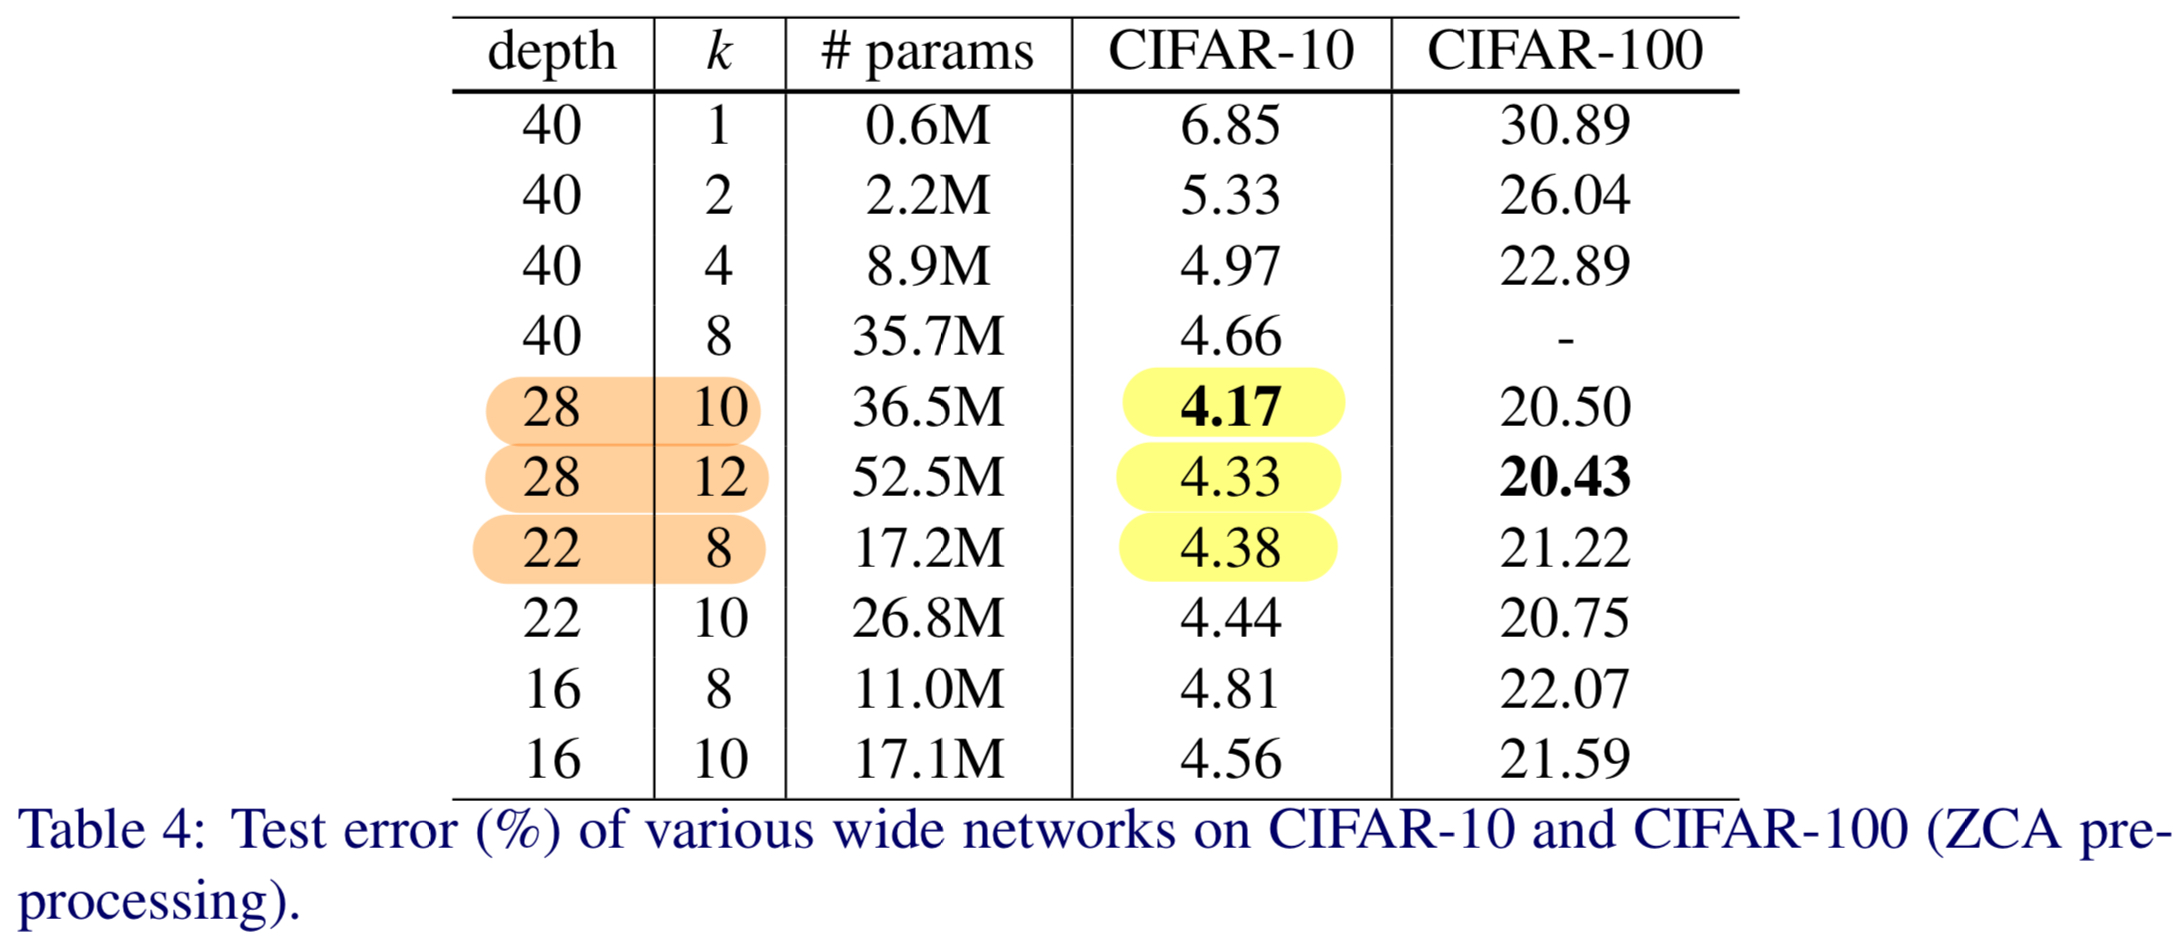

In [ ]:
#### GRADED CELL ####.
#ΠΡΩΤΟΣ ΣΥΝΔΥΑΣΜΟΣ ΧΩΡΙΣ DROPOUT

# Complete the following parameters and run the cell

# Model Parameters cell 1
num_epochs = 20

num_iters = 391 * num_epochs  # number of total epochs to run

batch_size = 128

print_freq = 391 # evaluation frequency (and log) (every epoch)
#depth = πλήθος layers και width=k=widening_factor
#ο πρώτος(και καλύτερος συνδυασμός) που θα τρέξουμε και μας λέει το paper ότι για το dataset CIFAR-10 έχει % error ίσο με 4,17 είναι ο depth=28 και k=10

layers = 28  # total number of layers of wrn (wide residual network)
num_classes = 10  # Number of classes of th CIFAR dataset
widen_factor = 10
droprate =  0.0 #  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)

model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))

logfile = open(os.path.join(exp_dir,'log_1_without_dropout.txt'), 'w')
train_model(num_iters, train_loader, model)

Validation set acc 0.5771
Validation set acc 0.7022
Validation set acc 0.7542
Validation set acc 0.7973
Validation set acc 0.7911
Validation set acc 0.8288
Validation set acc 0.8203
Validation set acc 0.8009
Validation set acc 0.8514
Validation set acc 0.8188
Validation set acc 0.8754
Validation set acc 0.8814
Validation set acc 0.8936
Validation set acc 0.9124
Validation set acc 0.9204
Validation set acc 0.9241
Validation set acc 0.9313
Validation set acc 0.9346
Validation set acc 0.9371
Cifar accuracy (0.0016736230213195086, 0.9367)


In [ ]:
#SAVE
save_checkpoint(model.state_dict(), "CIFAR-10","model1_without_dropout")

In [ ]:
#LOAD
loaded_model1_without_dropout = WideResNet(layers, num_classes, widen_factor, droprate)
loaded_model1_without_dropout.load_state_dict(torch.load("/content/drive/My Drive/Lab_DL_ex1/runs/CIFAR-10/model1_without_dropout/checkpoint.pth.tar))
loaded_model1_without_dropout


In [ ]:
#### GRADED CELL ####
#ΔΕΥΤΕΡΟΣ ΣΥΝΔΥΑΣΜΟΣ ΧΩΡΙΣ DROPOUT
# Complete the following parameters and run the cell

# Model Parameters cell 2
num_epochs = 20

num_iters = 391 * num_epochs  # number of total epochs to run

batch_size = 128

print_freq = 391 # evaluation frequency (and log) (every epoch)

layers =  28# total number of layers of wrn (wide residual network)
num_classes = 10   # Number of classes of th CIFAR dataset
widen_factor =12
droprate = 0.0  #  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)


model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))
logfile = open(os.path.join(exp_dir,'log_2_without_dropout.txt'), 'w')
train_model(num_iters, train_loader, model)

Validation set acc 0.5899
Validation set acc 0.6612
Validation set acc 0.749
Validation set acc 0.7969
Validation set acc 0.8003
Validation set acc 0.7983
Validation set acc 0.7637
Validation set acc 0.8116
Validation set acc 0.8472
Validation set acc 0.8699
Validation set acc 0.8679
Validation set acc 0.8998
Validation set acc 0.8962
Validation set acc 0.9079
Validation set acc 0.9203
Validation set acc 0.9313
Validation set acc 0.9358
Validation set acc 0.9356
Validation set acc 0.9385
Cifar accuracy (0.0016621798731386661, 0.9385)


In [ ]:
#SAVE!
save_checkpoint(model.state_dict(), "CIFAR-10","model2_without_dropout")

In [ ]:
#LOAD
loaded_model2_without_dropout = WideResNet(layers, num_classes, widen_factor, droprate)
loaded_model2_without_dropout.load_state_dict(torch.load("/content/drive/My Drive/Lab_DL_ex1/runs/CIFAR-10/model2_without_dropout/checkpoint.pth.tar))
loaded_model2_without_dropout


In [ ]:
runs_name = "/content/drive/My Drive/Lab_DL_ex1/runs"
torch.save(model.state_dict(), os.path.join(runs_name, 'model2_without_dropout'))

In [ ]:
#### GRADED CELL ####
#ΤΡΙΤΟΣ ΣΥΝΔΥΑΣΜΟΣ ΧΩΡΙΣ DROPOUT
# Complete the following parameters and run the cell

# Model Parameters cell 3
num_epochs = 20

num_iters = 391 * num_epochs  # number of total epochs to run

batch_size = 128

print_freq = 391 # evaluation frequency (and log) (every epoch)

layers =  22 # total number of layers of wrn (wide residual network)
num_classes = 10   # Number of classes of th CIFAR dataset
widen_factor = 8
droprate = 0.0   #  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)


model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))

logfile = open(os.path.join(exp_dir,'log_3_without_dropout.txt'), 'w')
train_model(num_iters, train_loader, model)

Validation set acc 0.5674
Validation set acc 0.6306
Validation set acc 0.7615
Validation set acc 0.6906
Validation set acc 0.7322
Validation set acc 0.8006
Validation set acc 0.7937
Validation set acc 0.8544
Validation set acc 0.8577
Validation set acc 0.8502
Validation set acc 0.8784
Validation set acc 0.8967
Validation set acc 0.9002
Validation set acc 0.9094
Validation set acc 0.9131
Validation set acc 0.9269
Validation set acc 0.9324
Validation set acc 0.9356
Validation set acc 0.9385
Cifar accuracy (0.0016621316201984883, 0.9381)


In [ ]:
#SAVE!
save_checkpoint(model.state_dict(), "CIFAR-10","model3_without_dropout")
# #save2 (είχα αρχικά πρόβλημα με την συνάρτηση οπότε τα διπλοαποθηκεύω σε ξεχωριστά paths)
# runs_name = "/content/drive/My Drive/Lab_DL_ex1/runs"
# torch.save(model.state_dict(), os.path.join(runs_name, 'model3_without_dropout'))

In [ ]:
#LOAD
loaded_model3_without_dropout = WideResNet(layers, num_classes, widen_factor, droprate)
loaded_model3_without_dropout.load_state_dict(torch.load("/content/drive/My Drive/Lab_DL_ex1/runs/CIFAR-10/model3_without_dropout/checkpoint.pth.tar))
loaded_model3_without_dropout

Στα παραπάνω αποτελέσματα που κάναμε την εκπαίδευση χωρίς την μέθοδο του dropout θα περιμέναμε να δούμε σε κάποια φάση όσο προχωρούσαν τα epochs το accuracy στο τεστ να έπεφτε, και εκεί θα βλέπαμε το overfitting. Ωστόσο μάλλον επειδή το τρέχουμε για λίγες εποχές αυτό δεν φαίνεται εδώ και το accuracy συνεχώς ανεβαίνει όσο προχωράει το training χωρίς να συναντήσουμε το πρόβλημα του overfitting.

Επίσης, απ'τα 3 μοντέλα αυτό με το υψηλότερο ποσοστό accuracy είναι αυτό με τον εξής συνδυασμό παραμέτρων :
layers = 28 και widen_factor = 12.

## **Ζητούμενο 2:**
Στα επόμενα κελιά εφαρμόζουμε την μέθοδο του **dropout**,που με απλά λόγια σημαίνει ότι σε ένα συγκεκριμένο forward/backward pass αγνοούμε τυχαία κάποιους νευρώνες. Κύριος στόχος αυτής της μεθόδου είναι η αποφυγή του overfit στο συγκεκριμένο training dataset. Θέλουμε δηλαδή να επιτύχουμε το generalization. Επισημαίνουμε ότι κάθε φορά που κάνουμε forward/backward pass "απενεργοποιούμε" άλλουν νευρώνες(δεν είναι δηλαδή πάντα οι ίδιοι off). Επιλέγουμε **droprate=0.3** (που είναι η πιθανότητα σε κάθε pass να αγνοηθεί) λαμβάνοντας την τιμή αυτή από το προαναφερόμενο paper σελ.9.

In [ ]:
#### GRADED CELL ####.
#ΠΡΩΤΟΣ ΣΥΝΔΥΑΣΜΟΣ ΜΕ DROPOUT

# Complete the following parameters and run the cell

# Model Parameters cell 1
num_epochs = 20

num_iters = 391 * num_epochs  # number of total epochs to run

batch_size = 128

print_freq = 391 # evaluation frequency (and log) (every epoch)
#depth = πλήθος layers και width=k=widening_factor
#ο πρώτος(και καλύτερος συνδυασμός) που θα τρέξουμε και μας λέει το paper ότι για το dataset CIFAR-10 έχει % error ίσο με 4,17 είναι ο depth=28 και k=10

layers = 28  # total number of layers of wrn (wide residual network)
num_classes = 10  # Number of classes of th CIFAR dataset
widen_factor = 10
droprate =  0.3 #  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)

model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))

logfile = open(os.path.join(exp_dir,'log_1_with_dropout.txt'), 'w')
train_model(num_iters, train_loader, model)

Validation set acc 0.4271
Validation set acc 0.6665
Validation set acc 0.7138
Validation set acc 0.7115
Validation set acc 0.7629
Validation set acc 0.7338
Validation set acc 0.8388
Validation set acc 0.8246
Validation set acc 0.8276
Validation set acc 0.8489
Validation set acc 0.8633
Validation set acc 0.8891
Validation set acc 0.8808
Validation set acc 0.905
Validation set acc 0.9035
Validation set acc 0.921
Validation set acc 0.9296
Validation set acc 0.9338
Validation set acc 0.9354
Cifar accuracy (0.0016604704283177854, 0.9332)


In [ ]:
#SAVE!
save_checkpoint(model.state_dict(), "CIFAR-10","model1_with_dropout")

In [ ]:
#LOAD
loaded_model1_with_dropout = WideResNet(layers, num_classes, widen_factor, droprate)
loaded_model1_with_dropout.load_state_dict(torch.load("/content/drive/My Drive/Lab_DL_ex1/runs/CIFAR-10/model1_with_dropout/checkpoint.pth.tar))
loaded_model1_with_dropout

In [ ]:
# runs_name = "/content/drive/My Drive/Lab_DL_ex1/runs"
# torch.save(model.state_dict(), os.path.join(runs_name, 'model1_with_dropout'))

In [ ]:
#### GRADED CELL ####
#ΔΕΥΤΕΡΟΣ ΣΥΝΔΥΑΣΜΟΣ ΜΕ DROPOUT
# Complete the following parameters and run the cell

# Model Parameters cell 2
num_epochs = 20

num_iters = 391 * num_epochs  # number of total epochs to run

batch_size = 128

print_freq = 391 # evaluation frequency (and log) (every epoch)

layers =  28# total number of layers of wrn (wide residual network)
num_classes = 10   # Number of classes of th CIFAR dataset
widen_factor =12
droprate = 0.3  #  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)


model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))
logfile = open(os.path.join(exp_dir,'log_2_with_dropout.txt'), 'w')
train_model(num_iters, train_loader, model)

Validation set acc 0.5346
Validation set acc 0.6324
Validation set acc 0.7339
Validation set acc 0.7596
Validation set acc 0.7591
Validation set acc 0.823
Validation set acc 0.8352
Validation set acc 0.8131
Validation set acc 0.858
Validation set acc 0.8689
Validation set acc 0.8833
Validation set acc 0.8808
Validation set acc 0.8992
Validation set acc 0.8978
Validation set acc 0.9137
Validation set acc 0.9193
Validation set acc 0.9253
Validation set acc 0.931
Validation set acc 0.9348
Cifar accuracy (0.0017860399216413497, 0.9323)


In [ ]:
#SAVE!
save_checkpoint(model.state_dict(), "CIFAR-10","model2_with_dropout_final")

In [ ]:
#LOAD
loaded_model2_with_dropout = WideResNet(layers, num_classes, widen_factor, droprate)
loaded_model2_with_dropout.load_state_dict(torch.load("/content/drive/My Drive/Lab_DL_ex1/runs/CIFAR-10/model2_with_dropout_final/checkpoint.pth.tar))
loaded_model2_with_dropout

In [ ]:
# runs_name = "/content/drive/My Drive/Lab_DL_ex1/runs"
# torch.save(model.state_dict(), os.path.join(runs_name, 'model2_with_dropout'))

In [ ]:
#### GRADED CELL ####
#ΤΡΙΤΟΣ ΣΥΝΔΥΑΣΜΟΣ ΜΕ DROPOUT
# Complete the following parameters and run the cell

# Model Parameters cell 3
num_epochs = 20

num_iters = 391 * num_epochs  # number of total epochs to run

batch_size = 128

print_freq = 391 # evaluation frequency (and log) (every epoch)

layers =  22 # total number of layers of wrn (wide residual network)
num_classes = 10   # Number of classes of th CIFAR dataset
widen_factor = 8
droprate = 0.3   #  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)


model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))

logfile = open(os.path.join(exp_dir,'log_3_with_dropout.txt'), 'w')
train_model(num_iters, train_loader, model)

Validation set acc 0.5516
Validation set acc 0.6647
Validation set acc 0.7524
Validation set acc 0.7503
Validation set acc 0.747
Validation set acc 0.7823
Validation set acc 0.7964
Validation set acc 0.8007
Validation set acc 0.8342
Validation set acc 0.862
Validation set acc 0.8624
Validation set acc 0.8798
Validation set acc 0.8967
Validation set acc 0.8896
Validation set acc 0.9024
Validation set acc 0.918
Validation set acc 0.9242
Validation set acc 0.9303
Validation set acc 0.9313
Cifar accuracy (0.0017140763357281685, 0.9327)


In [ ]:
#SAVE!
save_checkpoint(model.state_dict(), "CIFAR-10","model3_with_dropout_final")

In [ ]:
#LOAD
loaded_model3_with_dropout = WideResNet(layers, num_classes, widen_factor, droprate)
loaded_model3_with_dropout.load_state_dict(torch.load("/content/drive/My Drive/Lab_DL_ex1/runs/CIFAR-10/model3_with_dropout_final/checkpoint.pth.tar))
loaded_model3_with_dropout

In [ ]:
# runs_name = "/content/drive/My Drive/Lab_DL_ex1/runs"
# torch.save(model.state_dict(), os.path.join(runs_name, 'model3_with_dropout'))

Παρατηρούμε ότι απ'τους 3 συνδυασμούς παραμέτρων, το μοντέλο που εκπαιδεύοντάς το(με dropout) πετύχαμε το μεγαλύτερο accuracy με τον συνδυασμό layers = 28 και widen_factor = 10. Παρατηρούμε ωστόσο ότι το accuracy των εκπαιδευμένων μοντέλων με dropout είναι χαμηλότερο σε σχέση με αυτά που βρίσκαμε στο 1ο ερώτημα. Αυτό με την πρώτη ματιά φαίνεται αρκετά περίεργο ωστόσο μπορούμε να κάνουμε κάποιες υποθέσεις για τις οποίες εδώ συμβαίνει αυτό. Όπως αναφέραμε στο 1ο ερώτημα λόγω,μάλλον, της εκπαίδευσης των μοντέλων για λίγες εποχές, δεν παρουσιάστηκε το πρόβλημα του overfitting, πράγμα που φάνηκε απ' το ότι ακόμα και κατά την διάρκεια του training, όταν αξιολογούσαμε το μοντέλο, το validation accuracy αυξανόταν καθώς περνούσαν οι εποχές. Συνεπώς το μοντέλο μας δεν ήταν prone σε overfitting λόγω του ότι δεν έχει εκπαιδευτεί για πολλές εποχές. Έτσι, η εκπαίδευση του ίδιου μοντέλου χρησιμοποιώντας dropout τελικά είναι λιγότερο αποδοτική αφού έτσι κι αλλιώς δεν υπήρχε το πρόβλημα του overfitting. Ενδέχεται επίσης το droprate που επιλέξαμε να είναι πολύ μεγάλο. Παρόλο που το droprate=0.3 το πήραμε από το paper, εκεί η εκπαίδευση των μοντέλων γινόταν για πολύ περισσότερες εποχές σε σχέση με εδώ. Επομένως ίσως με χαμηλότερες τιμές να πετυχαίναμε καλύτερα αποτελέσματα.

**Συνολικά**, το δίκτυο που πέτυχε τα καλύτερα αποτελέσματα ευστοχίας ήταν αυτό με layers = 28 και widen_factor = 12 και χωρίς dropout με ποσοστό ευστοχίας ίσο με 93.85%. Επομένως για το μέρος 3 θα χρησιμοποιήσουμε αυτό το μοντέλο.

# Μέρος 3
## WRN με MIxup augmentation στο CIFAR-C


Στις περισσότερες επιτυχημένες εφαρμογές τα νευρωνικά δίκτυα (large deep neuaral networks) μοιράζονται δύο κοινά σημεία. Πρώτον, είναι
εκπαιδευμένοι ώστε να ελαχιστοποιούν το μέσο σφάλμα τους στα δεδομένα εκπαίδευσης, ένας κανόνας εκμάθησης γνωστός και Empirical Risk Minimazation (ERM) (Vapnik, 1998). Δεύτερον, το μέγεθος αυτών των νευρωνικών δικτύων  κλιμακώνεται γραμμικά με τον αριθμό των παραδειγμάτων εκπαίδευσης.

Παραδόξως, ένα κλασικό αποτέλεσμα στη θεωρία μάθησης (Vapnik & Chervonenkis, 1971) μας λέει ότι η
η σύγκλιση του ERM είναι εγγυημένη εφόσον το μέγεθος της μηχανής εκμάθησης (π.χ.
δίκτυο) δεν αυξάνεται με τον αριθμό των δεδομένων εκπαίδευσης. Εδώ, το μέγεθος μιας μηχανής εκμάθησης μετριέται ως προς τον αριθμό των παραμέτρων το.

Αυτή η αντίφαση αμφισβητεί την καταλληλότητα του ERM να εκπαιδεύει τα τρέχοντα μοντέλα νευρωνικών δικτύων μας. Από τη μία πλευρά, ο ERM επιτρέπει σε μεγάλα νευρωνικά δίκτυα να απομνημονεύουν
(αντί να γενικεύσουμε από) τα δεδομένα εκπαίδευσης ακόμη και με την παρουσία ισχυρής ομαλοποίησης (Dropout). Επίσης, α νευρωνικά δίκτυα που έχουν εκπαιδευτεί με ERM αλλάζουν δραστικά τις προβλέψεις τους όταν αξιολογούνται
παραδείγματα με μικρές διαφορές από την κατανομή της εκπαίδευσης (adversarial examples). Αυτά τα στοιχεία υποδηλώνουν ότι ο ERM δεν είναι σε θέση να εξηγήσει ή να παράσχει γενίκευση στις δοκιμές κατανομές που διαφέρουν ελάχιστα από τα δεδομένα εκπαίδευσης. Ωστόσο, ποια είναι η εναλλακτική του ERM;

Η μέθοδος επιλογής για εκπαίδευση σε παρόμοια αλλά διαφορετικά παραδείγματα με τα δεδομένα εκπαίδευσης είναι γνωστή ως δεδομένα επάυξησης (Data augmentation) (Simard et al., 1998), Vicinal Risk Minimization (VRM)
(Chapelle et al., 2000). Στο VRM, απαιτείται ανθρώπινη γνώση για να περιγράψει μια γειτονιά γύρω από κάθε παράδειγμα στα δεδομένα εκπαίδευσης. Στη συνέχεια, μπορούν να αντληθούν πρόσθετα εικονικά παραδείγματα από το
διανομή των παραδειγμάτων εκπαίδευσης σε κοντινή απόσταση για να διευρυνθεί η υποστήριξη της κατανομής εκπαίδευσης. Για παράδειγμα, κατά την εκτέλεση ταξινόμησης εικόνων, είναι σύνηθες να ορίζεται η γειτνίαση μιας εικόνας
ως το σύνολο των οριζόντιων αντανακλάσεων, των ελαφρών περιστροφών. Ενώ η αύξηση δεδομένων οδηγεί σταθερά σε βελτιωμένη γενίκευση, η διαδικασία εξαρτάται από τα δεδομένα, και συνεπώς απαιτεί τη χρήση ειδικών γνώσεων. Επιπλέον, η αύξηση δεδομένων προϋποθέτει ότι τα παραδείγματα στην περιοχή μοιράζονται την ίδια κλάση και δεν μοντελοπιούν τη σχέση γειτνίασης μεταξύ των παραδειγμάτων
διαφορετικών κλάσεων.

Έχοντας αυτά σαν δεδομένα θα δοκιμάσουμε το mixup  ["mixup data augmentation"](https://arxiv.org/pdf/1710.09412.pdf).

Εν συντομία, το mixup κατασκευάζει εικονικά δεδομένα εκπαίδευσης με τον εξής τρόπο:

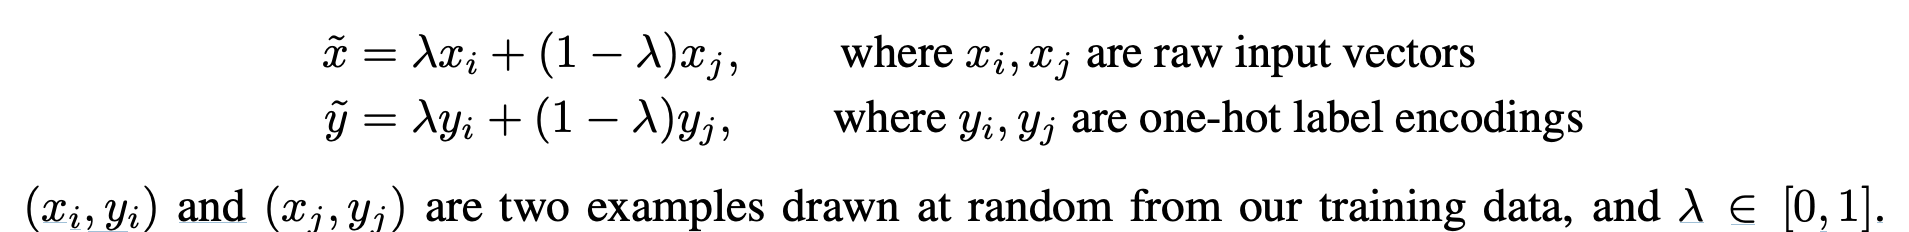

#### Αξιολόγηση του μοντέλου στο CIFAR-C

Για να καταλάβουμε περισσότερο τη χρησιμότητα του mixup και γενικότερα της επαύξησησς της κατανομής των δεδομένων εκπαίδευσης θα εκπαιδεύσουμε πάλι το μοντέλο μας στο CIFAR αλλά θα το κάνουμε evaluate στο CIFAR-C.

ΤοCIFAR-C παριέχει διάφορα corruptions (adversarial examples) στις εικόνες του αρχικού dataset, κάτι που το καθιστά πιο κοντά σε μια ρεαλιστική αξιολόγηση του μοντέλου.

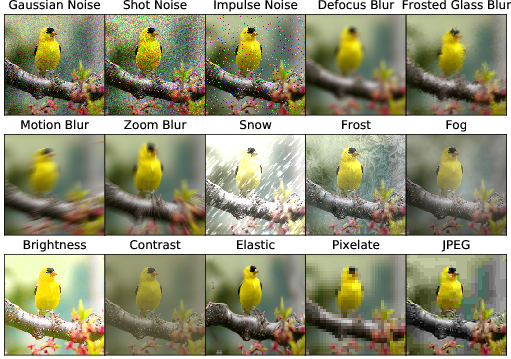


Προσθέτουμε τον κώδικα που υλοποιεί το mixup κατά την διάρκεια του training παίρνοντας α=1 όπως προτείνεται από το paper με τίτλο "mixup: BEYOND EMPIRICAL RISK MINIMIZATION" στην σελίδα 5 στην ενότητα 3.2 .

In [ ]:
#### GRADED CELL ####

# Complete the following code and run the cell


class CIFAR_Dataset(Dataset):
    def __init__(self, data_dir, train, transform, mixup):
        self.data_dir = data_dir
        self.train = train
        self.transform = transform
        self.data = []
        self.targets = []
        self.mixup = mixup

        # Loading all the data depending on whether the dataset is training or testing
        if self.train:
            for i in range(5):
                with open(data_dir + 'data_batch_' + str(i+1), 'rb') as f:
                    entry = pickle.load(f, encoding='latin1')
                    self.data.append(entry['data'])
                    self.targets.extend(entry['labels'])
        else:
            with open(data_dir + 'test_batch', 'rb') as f:
                entry = pickle.load(f, encoding='latin1')
                self.data.append(entry['data'])
                self.targets.extend(entry['labels'])

        # Reshape it and turn it into the HWC format which PyTorch takes in the images
        # Original CIFAR format can be seen via its official page
        self.data = np.vstack(self.data).reshape(-1, 3, 32, 32)
        self.data = self.data.transpose((0, 2, 3, 1))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):

        # Create a one hot label
        #πινακας με ολα μηδενικα εκτος απ το index μας που ειναι η κατηγορια μας
        label = torch.zeros(10)
        label[self.targets[idx]] = 1.

        # Transform the image by converting to tensor and normalizing it
        if self.transform:
            image = transform(self.data[idx])

        # If data is for training, perform mixup, only perform mixup roughly on 1 for every 5 images(mixup καθε πεμπτη εικονα με μια τυχαια)
        if self.train and idx > 0 and self.mixup and idx%5 == 0:

            # Choose another image/label randomly
            mixup_idx = random.randint(0, len(self.data)-1) #διαλεγεις μια εικονα απο αλλη κατηγορια
            mixup_label = torch.zeros(10) #mixup κανεις και τις εικονες και τα labels
            mixup_label[self.targets[mixup_idx]] = 1.
            if self.transform:
                mixup_image = transform(self.data[mixup_idx])

            # Select a random number from the given beta distribution
            # Mixup the images accordingly
            ### Graded Part ###
            alpha=1
            #Generation of random lambda value from a beta distribution
            lam = np.random.beta(alpha,alpha)
            #Mix the pixel values of the two images based on lambda
            image = lam * image + (1 - lam) * mixup_image
            label = lam * label + (1 - lam) * mixup_label

        return image, label

In [ ]:
#HLI
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

CORRUPTIONS = [
    'gaussian_noise', 'shot_noise', 'impulse_noise', 'defocus_blur',
    'glass_blur', 'motion_blur', 'zoom_blur', 'snow', 'frost', 'fog',
    'brightness', 'contrast', 'elastic_transform', 'pixelate',
    'jpeg_compression'
]

In [ ]:
# Evaluation scripts


def val_cifar(test_loader, net):
    """Evaluate network on given dataset."""
    net.eval()
    total_loss = 0.
    total_correct = 0
    with torch.no_grad():
        for images, targets in test_loader:
            images = images.to(device)
            targets = targets.to(device)

            #targets = targets.cuda(non_blocking=True).long()
            #images = images.cuda(non_blocking=True).float()
            logits = net(images)
            pred = logits.data.max(1)[1]
            #total_correct += pred.eq(targets.data).sum().item()
            total_correct += int((pred == torch.argmax(targets, dim=1)).float().sum())
    #print("len(test_loader.dataset)", len(test_loader.dataset))
    return total_correct / len(test_loader.dataset)


def test_cifar(test_loader, net):
    """Evaluate network on given dataset."""
    net.eval()
    params = list(net.parameters())
    total_loss = 0.
    total_correct = 0
    with torch.no_grad():
        for images, targets in test_loader:
            images = images.to(device)
            targets = targets.to(device)
            logits = net(images)

            loss = F.cross_entropy(logits, targets)
            pred = logits.data.max(1)[1]
            total_loss += float(loss.data)
            total_correct += pred.eq(targets.data).sum().item()
    #print("len(test_loader.dataset)", len(test_loader.dataset))
    return total_loss / len(test_loader.dataset), total_correct / len(test_loader.dataset)


def test_c_cifar(net):
    """Evaluate network on given corrupted dataset."""
    base_path = '/content/drive/My Drive/Lab_DL_ex1/data/cifar/CIFAR-10-C/'
    #base_path = folder_path + '\\data\\cifar\\CIFAR-10-C\\'
    normalize = transforms.Normalize([0.5] * 3, [0.5] * 3)
    test_transform = transforms.Compose(
        [transforms.ToTensor(), normalize])
    test_data = datasets.CIFAR10(
        '/content/drive/My Drive/Lab_DL_ex1/data/cifar/', train=False, transform=test_transform)
    #test_data = datasets.CIFAR10(
     #   folder_path + '\\data\\cifar\\', train=False, transform=test_transform)
    corruption_accs = []
    Weather_accs = []
    Blur_accs = []
    Noise_accs = []
    Digital_accs = []
    weather_corr = ['snow', 'frost', 'fog']
    blur_corr = ['defocus_blur', 'glass_blur', 'motion_blur', 'zoom_blur']
    noise_corr = ['gaussian_noise', 'shot_noise', 'impulse_noise']
    digital_corr = ['brightness', 'contrast', 'elastic_transform', 'pixelate', 'jpeg_compression']

    for corruption in CORRUPTIONS:
        # Reference to original data is mutated
        test_data.data = np.load(base_path + corruption + '.npy')[-10000:]  # take the level 5 severity only
        #pdb.set_trace()
        test_data.targets = torch.LongTensor(np.load(base_path + 'labels.npy')[-10000:])

        test_loader = torch.utils.data.DataLoader(
            test_data,
            batch_size=batch_size,
            shuffle=False,
            #num_workers=4,
            pin_memory=True)
        test_loss, test_acc = test_cifar(test_loader, net)
        corruption_accs.append(test_acc)
        if corruption in weather_corr:
            Weather_accs.append(test_acc)
        elif corruption in blur_corr:
            Blur_accs.append(test_acc)
        elif corruption in noise_corr:
            Noise_accs.append(test_acc)
        elif corruption in digital_corr:
            Digital_accs.append(test_acc)


        #print('{}\n\tTest Loss {:.3f} | Test Acc {:.3f}'.format(
        #    corruption, test_loss, test_acc))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Weather', np.mean(np.array(Weather_accs))))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Blur', np.mean(np.array(Blur_accs))))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Noise', np.mean(np.array(Noise_accs))))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Digital', np.mean(np.array(Digital_accs))))
    all_accs = []
    all_accs.append(np.mean(np.array(Weather_accs)))
    all_accs.append(np.mean(np.array(Blur_accs)))
    all_accs.append(np.mean(np.array(Noise_accs)))
    all_accs.append(np.mean(np.array(Digital_accs)))

    return np.mean(np.array(all_accs))

In [ ]:
# Utils scripts

def save_checkpoint(state, dataset, exp_name, filename='checkpoint.pth.tar'):
    """Saves checkpoint to disk"""
    directory = "/content/drive/My Drive/Lab_DL_ex1/runs/%s/%s/" % (dataset, exp_name)
    #directory = folder_path + "\\runs\\%s\\%s\\" % (dataset, exp_name)
    if not os.path.exists(directory):
        os.makedirs(directory)
    filename = directory + filename
    torch.save(state, filename)


class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res


def get_lr(step, total_steps, lr_max, lr_min):
  """Compute learning rate according to cosine annealing schedule."""
  return lr_min + (lr_max - lr_min) * 0.5 * (1 +
                                             np.cos(step / total_steps * np.pi))
def bceloss(x, y):
    eps = 1e-6
    return -torch.mean(y * torch.log(x + eps) + (1 - y) * torch.log(1 - x + eps))


Εκπαιδεύουμε για επιπλέον 10 εποχές(2 φορές ανεξάρτητα) το καλύτερο απ'τα μοντέλα των ερωτημάτων 1 και 2, το οποίο είναι αυτό με layers =  28, widen_factor =12 και χωρίς dropout. Την πρώτη φορά αφου το φορτώσουμε θα το εκπαιδεύσουμε όπως προηγουμένως ενώ την δεύτερη φορά θα χρησιμοποιήσουμε για την εκπαίδευση και την τεχνική mixup augmentation(ανά 5 εικόνες). Η τεχνική αυτή του data augmentation επιλέγεται προκειμένου να βελτιώσουμε το generalization performance του δικτύου μας ώστε να αποφύγουμε το πρόβλημα του memorization(που οδηγεί σε overfitting). Η βελτίωση αυτού θα κάνει το μοντέλο να μπορεί να ανταπεξέλθει και σε adversarial examples(εδώ οι εικόνες που έχουν υποστεί κάποιο corruption).
Στην συνέχεια τα μοντέλα, μετά από κάθε εποχή στο training τεστάρονται τόσο για το CIFAR-10(validation accuracy) όσο και για το CIFAR-C, το οποίο περιέχει εικόνες απ' το πρώτο dataset που έχουν υποστεί corruption, ώστε να ελεγχθεί η επίδοση του μοντέλου.

In [ ]:
#### GRADED CELL ####

# Κάντε train το καλύτερο μοντέλο που βρήκατε (και αποθηκεύσατε) στα βήματα 1 και 2 χωρίς το mixup
# Hint


num_epochs = 10 #βαζουμε 10 εποχες για να βγαίνει στον χρόνο που δίνει το colab

num_iters = 391 * num_epochs  # number of total epochs to run

batch_size = 128

print_freq = 391 # evaluation frequency (and log) (every epoch)

#καλυτερο μοντελο το δευτερο χωρις dropout
layers =  28# total number of layers of wrn (wide residual network)
num_classes = 10   # Number of classes of th CIFAR dataset
widen_factor =12
droprate = 0.0  #  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

#LOAD το καλυτερο μοντελο απ' αυτα που τρεξαμε πριν
model = WideResNet(layers, num_classes, widen_factor, droprate)
model.load_state_dict(torch.load("/content/drive/My Drive/Lab_DL_ex1/runs/CIFAR-10/model2_without_dropout/checkpoint.pth.tar"))
#model.load_state_dict(torch.load(folder_path+"\\runs\\CIFAR-10\\model2_without_dropout\\checkpoint.pth.tar"))
model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))

criterion = nn.CrossEntropyLoss().cuda()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_dataset = CIFAR_Dataset('/content/drive/My Drive/Lab_DL_ex1/data/cifar/cifar-10-batches-py/', 1, transform, False)
#train_dataset = CIFAR_Dataset(folder_path+'\\data\\cifar\\cifar-10-batches-py\\', 1, transform, False)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = CIFAR_Dataset('/content/drive/My Drive/Lab_DL_ex1/data/cifar/cifar-10-batches-py/', 0, transform, False)
#val_dataset = CIFAR_Dataset(folder_path+'\\data\\cifar\\cifar-10-batches-py\\', 0, transform, False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)



# Train loop
train_loader_iter = iter(train_loader)

counter_k = 0

epoch = 0

logfile = open(os.path.join(exp_dir,'log_best_model_without_mixup_a_1.txt'), 'w')

for t in range(0, num_iters):

    losses = AverageMeter()
    top1 = AverageMeter()
    model.train()

    try:
        input, target = next(train_loader_iter)
    except:
        train_loader_iter = iter(train_loader)
        input, target = next(train_loader_iter)
    #input, target = input.cuda(non_blocking=True).float(), target.cuda(non_blocking=True).long()
    imgs = input.to(device)
    labels = target.to(device)
    preds = model(imgs)
    preds = nn.Softmax(dim=1)(preds)
    loss = criterion(preds, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t % print_freq == 0 and t >= print_freq:
        print("t = ", t)
        prec1 = val_cifar(val_loader, model)
        print("Epoch ", epoch)
        print("Validation set acc", prec1)

        logfile.write('validation set acc: ' + str(prec1) + '\n')
        print('Average Cifar-C accuracy {}'.format(test_c_cifar(model)))
        epoch += 1


#SAVE!
save_checkpoint(model.state_dict(), "CIFAR-10","best_model_without_mixup_a_1")

t =  391
Epoch  0
Validation set acc 0.7648
Weather
	 Test Acc 0.519
Blur
	 Test Acc 0.461
Noise
	 Test Acc 0.294
Digital
	 Test Acc 0.482
Average Cifar-C accuracy 0.43896833333333335
t =  782
Epoch  1
Validation set acc 0.756
Weather
	 Test Acc 0.405
Blur
	 Test Acc 0.370
Noise
	 Test Acc 0.291
Digital
	 Test Acc 0.469
Average Cifar-C accuracy 0.38403624999999997
t =  1173
Epoch  2
Validation set acc 0.7468
Weather
	 Test Acc 0.526
Blur
	 Test Acc 0.454
Noise
	 Test Acc 0.229
Digital
	 Test Acc 0.453
Average Cifar-C accuracy 0.41556291666666667
t =  1564
Epoch  3
Validation set acc 0.822
Weather
	 Test Acc 0.467
Blur
	 Test Acc 0.421
Noise
	 Test Acc 0.204
Digital
	 Test Acc 0.503
Average Cifar-C accuracy 0.3986420833333333
t =  1955
Epoch  4
Validation set acc 0.7979
Weather
	 Test Acc 0.556
Blur
	 Test Acc 0.463
Noise
	 Test Acc 0.226
Digital
	 Test Acc 0.498
Average Cifar-C accuracy 0.4357424999999999
t =  2346
Epoch  5
Validation set acc 0.7223
Weather
	 Test Acc 0.351
Blur
	 Test

In [ ]:
#SAVE!
save_checkpoint(model.state_dict(), "CIFAR-10","best_model_without_mixup_a_1")

In [ ]:
#LOAD
loaded_best_model_without_mixup_a_1 = WideResNet(layers, num_classes, widen_factor, droprate)
loaded_best_model_without_mixup_a_1.load_state_dict(torch.load("/content/drive/My Drive/Lab_DL_ex1/runs/CIFAR-10/best_model_without_mixup_a_1/checkpoint.pth.tar))
loaded_best_model_without_mixup_a_1

In [ ]:
# runs_name = "/content/drive/My Drive/Lab_DL_ex1/runs"
# torch.save(model.state_dict(), os.path.join(runs_name, 'best_model_without_mixup_a_1'))

In [ ]:
#### GRADED CELL ####
# Train your best model with mixup and test on CIFAR-C

# Model parameters


num_epochs = 10 #βαζουμε 10 εποχες για να βγαίνει στον χρόνο που δίνει το colab

num_iters = 391 * num_epochs  # number of total epochs to run

batch_size = 128

print_freq = 391 # evaluation frequency (and log) (every epoch)

#καλυτερο μοντελο το δευτερο χωρις dropout
layers =  28# total number of layers of wrn (wide residual network)
num_classes = 10   # Number of classes of th CIFAR dataset
widen_factor =12
droprate = 0.0  #  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005


model = WideResNet(layers, num_classes, widen_factor, droprate)
model.load_state_dict(torch.load("/content/drive/My Drive/Lab_DL_ex1/runs/CIFAR-10/model2_without_dropout/checkpoint.pth.tar"))
#model.load_state_dict(torch.load(folder_path + "\\runs\\CIFAR-10\\model2_without_dropout\\checkpoint.pth.tar"))
model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))

criterion = nn.CrossEntropyLoss().cuda()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_dataset = CIFAR_Dataset('/content/drive/My Drive/Lab_DL_ex1/data/cifar/cifar-10-batches-py/', 1, transform, True)
#train_dataset = CIFAR_Dataset(folder_path + '\\data\\cifar\\cifar-10-batches-py', 1, transform, True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = CIFAR_Dataset('/content/drive/My Drive/Lab_DL_ex1/data/cifar/cifar-10-batches-py/', 0, transform, True)
#val_dataset = CIFAR_Dataset(folder_path + '\\data\\cifar\\cifar-10-batches-py', 0, transform, True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Train loop
logfile = open(os.path.join(exp_dir,'log_best_model_with_mixup_a_1.txt'), 'w')
train_loader_iter = iter(train_loader)

counter_k = 0

epoch = 0

for t in range(0, num_iters):

    losses = AverageMeter()
    top1 = AverageMeter()
    model.train()

    try:
        input, target = next(train_loader_iter)
    except:
        train_loader_iter = iter(train_loader)
        input, target = next(train_loader_iter)
    #input, target = input.cuda(non_blocking=True).float(), target.cuda(non_blocking=True).long()
    imgs = input.to(device)
    labels = target.to(device)
    preds = model(imgs)
    preds = nn.Softmax(dim=1)(preds)
    loss = criterion(preds, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t % print_freq == 0 and t >= print_freq:
        print("t = ", t)
        prec1 = val_cifar(val_loader, model)
        print("Epoch ", epoch)
        print("Validation set acc", prec1)
        logfile.write('validation set acc: ' + str(prec1) + '\n')
        print('Average Cifar-C accuracy {}'.format(test_c_cifar(model)))
        epoch += 1

t =  391
Epoch  0
Validation set acc 0.7798
Weather
	 Test Acc 0.486
Blur
	 Test Acc 0.409
Noise
	 Test Acc 0.240
Digital
	 Test Acc 0.512
Average Cifar-C accuracy 0.41186625
t =  782
Epoch  1
Validation set acc 0.8085
Weather
	 Test Acc 0.499
Blur
	 Test Acc 0.447
Noise
	 Test Acc 0.172
Digital
	 Test Acc 0.497
Average Cifar-C accuracy 0.40381958333333334
t =  1173
Epoch  2
Validation set acc 0.8104
Weather
	 Test Acc 0.468
Blur
	 Test Acc 0.383
Noise
	 Test Acc 0.133
Digital
	 Test Acc 0.510
Average Cifar-C accuracy 0.3737170833333333
t =  1564
Epoch  3
Validation set acc 0.6983
Weather
	 Test Acc 0.301
Blur
	 Test Acc 0.315
Noise
	 Test Acc 0.192
Digital
	 Test Acc 0.414
Average Cifar-C accuracy 0.30514875
t =  1955
Epoch  4
Validation set acc 0.8125
Weather
	 Test Acc 0.552
Blur
	 Test Acc 0.395
Noise
	 Test Acc 0.274
Digital
	 Test Acc 0.486
Average Cifar-C accuracy 0.42672125
t =  2346
Epoch  5
Validation set acc 0.789
Weather
	 Test Acc 0.433
Blur
	 Test Acc 0.433
Noise
	 Test A

In [ ]:
#SAVE!
save_checkpoint(model.state_dict(), "CIFAR-10","best_model_with_mixup_a_1")

In [ ]:
#LOAD
loaded_best_model_with_mixup_a_1 = WideResNet(layers, num_classes, widen_factor, droprate)
loaded_best_model_with_mixup_a_1.load_state_dict(torch.load("/content/drive/My Drive/Lab_DL_ex1/runs/CIFAR-10/best_model_with_mixup_a_1/checkpoint.pth.tar))
loaded_best_model_with_mixup_a_1

Συνολικά παρατηρούμε πολλές αυξομειώσεις στις τιμές των accuracies, πράγμα που πολύ πιθανά να προέρχεται από το overfitting, καθώς χρησιμοποιήσαμε μοντέλο χωρίς dropout(το overfitting ίσως παρουσιάστηκε τώρα που εκπαιδεύσαμε το μοντέλο για επιπλέον εποχές). Παρατηρούμε ότι στην περίπτωση του validation accuracy πάνω στο CIFAR-10, το μοντέλο στο οποίο εφαρμόσαμε το mixup, ύστερα από κάθε εποχή training, σχεδόν σε όλες υπερτερεί έναντι του μοντέλου που εκπαιδεύσαμε χωρίς το mixup.Στην τελευταία ωστόσο εποχή βλέπουμε μεγάλη διαφορά μεταξύ των 2, με το μοντέλο χωρίς το mixup να είναι κατά 6% περίπου καλύτερο απ'το μοντέλο με mixup.Αυτό είναι πιθανό να άλλαζε αν κάναμε train τα μοντέλα για περισσότερες εποχές,γιατί πιθανά μέχρο αυτό το σημείο η πτώση του loss να μην είναι τόσο ομαλή, πράγμα που δεν μας δίνει σαφή εικόνα. Έτσι, επειδή οι εποχές που το εκπαιδεύσαμε είναι πολύ λίγες λόγω των περιορισμών του colab δεν μπορούμε να εξάγουμε σαφή συμπεράσματα. Εξαιτίας αυτού καταλήγουμε σε ασυνέπειες και για το τεστάρισμα των μοντέλων με το dataset που περιέχει τα corrupted images, όπου το αναμενόμενο θα ήταν να παίρναμε μεγαλύτερες τιμές accuracy απ'το μοντέλο που εκπαιδεύσαμε εφαρμόζοντας το mixup,πράγμα που εδώ δεν συμβαίνει. Δεν εχει αρχισει να ειναι smooth η πτωση του loss

In [ ]:
# runs_name = "/content/drive/My Drive/Lab_DL_ex1/runs"
# torch.save(model.state_dict(), os.path.join(runs_name, 'best_model_with_mixup_a_1'))

In [ ]:
#### GRADED CELL #### (Bonus)

# Plot the confidence scores for CIFAR-C with WRN model
# trained with and without mixup and comment